In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import label_stats as ls
from skimage import io
from glob import glob
import os
from pathlib import Path

In [3]:
data_dir = '/Users/cgroschner/Box Sync/Research/HR-TEM/particleRecognition/*'

In [4]:
data_files = glob(data_dir)

In [5]:
label_dict = {'101729F':{'yes':0,'no':0,'null':0},'101727H':{'yes':0,'no':0,'null':0}}
size_dict = {'101729F':[],'101727H': []}
for file in data_files:
    yes = 0
    no = 0
    null = 0
    txt_names = file + '/*/adjustedPNG2/*.txt' 
    txt_files = glob(txt_names)
    for txt in txt_files:
        if '101727H' in txt.split('/')[-3]:
            sample = '101727H'
        elif '101729F' in txt.split('/')[-3]:
            sample = '101729F'
        else:
            print(txt.split('/')[-3])
            raise RuntimeError('Sample not identified or of unexpected label. Please check file naming scheme.')
        _, radii, labels, _ = ls.txt_reader(txt)
        for label in labels:
            if label == 'yes':
                label_dict[sample]['yes']+=1
            elif label == 'no':
                label_dict[sample]['no']+=1
            elif label == 'null':
                label_dict[sample]['null']+=1
        for radius in radii:
            size_dict[sample].append(radius)

# Particle Stats:

## Stats on 101729H

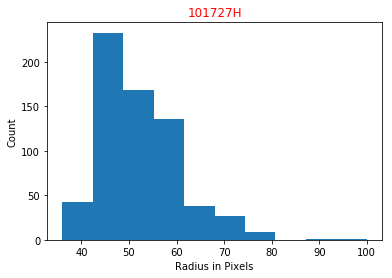

In [6]:
_ = plt.hist(size_dict['101727H'],bins =10)
_= plt.title('101727H',color = 'r')
_ = plt.xlabel('Radius in Pixels')
_ = plt.ylabel('Count')

In [11]:
print('*101727H Stats*')
print('\n')
print('mean radius: {0:.2f}, std: {1:.2f}'.format(np.array(size_dict['101727H']).mean(),np.array(size_dict['101727H']).std()))
print('\n')
sum_101727H = label_dict['101727H']['yes'] + label_dict['101727H']['no'] + label_dict['101727H']['null']
print('total particles identified: {}'.format(sum_101727H))
print('\n')
print('Makeup of labeled particles: yes {0:.2f}%, no {1:.2f}%, null {2:.2f}%'.format(label_dict['101727H']['yes']/sum_101727H*100,label_dict['101727H']['no']/sum_101727H*100,label_dict['101727H']['null']/sum_101727H*100))
percent_yes = (label_dict['101727H']['yes']/(label_dict['101727H']['yes']+label_dict['101727H']['no']))*100
percent_no = (label_dict['101727H']['no']/(label_dict['101727H']['yes']+label_dict['101727H']['no']))*100
print('Makeup of atomic resolution particles: yes {0:.2f}%, no {1:.2f}%'.format(percent_yes,percent_no))


*101727H Stats*


mean radius: 52.16, std: 8.15


total particles identified: 656


Makeup of labeled particles: yes 18.75%, no 13.41%, null 67.84%
Makeup of atomic resolution particles: yes 58.29%, no 41.71%


## Stats on 101279F

In [ ]:
_ = plt.hist(size_dict['101729F'],bins =10)
_ = plt.title('101279F', color = 'b')
_ = plt.xlabel('Radius in Pixels')
_ = plt.ylabel('Count')

In [12]:
print('*101729F Stats*')
print('\n')
print('mean radius: {0:.2f}, std: {1:.2f}'.format(np.array(size_dict['101729F']).mean(),np.array(size_dict['101729F']).std()))
print('\n')
sum_101729F = label_dict['101729F']['yes'] + label_dict['101729F']['no'] + label_dict['101729F']['null']
print('total particles identified: {}'.format(sum_101729F))
print('\n')
print('Makeup of labeled particles: yes {0:.2f}%, no {1:.2f}%, null {2:.2f}%'.format(label_dict['101729F']['yes']/sum_101729F*100,label_dict['101729F']['no']/sum_101729F*100,label_dict['101729F']['null']/sum_101729F*100))
percent_yes = (label_dict['101729F']['yes']/(label_dict['101729F']['yes']+label_dict['101729F']['no']))*100
percent_no = (label_dict['101729F']['no']/(label_dict['101729F']['yes']+label_dict['101729F']['no']))*100
print('Makeup of atomic resolution particles: yes {0:.2f}%, no {1:.2f}%'.format(percent_yes,percent_no))

*101729F Stats*


mean radius: 56.27, std: 9.00


total particles identified: 1222


Makeup of labeled particles: yes 17.43%, no 11.29%, null 71.28%
Makeup of atomic resolution particles: yes 60.68%, no 39.32%
